In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as k
from tensorflow.keras import backend
#from keras import backend as K
from tensorflow_core.python.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
import cv2 
from tqdm import tqdm
from PIL import Image

In [17]:
X=[]
Z=[]
IMG_SIZE=32
ab_DIR='C:/Users/ntadi/Pictures/ab'
bhumra_DIR='C:/Users/ntadi/Pictures/bhumra'
dhawan_DIR='C:/Users/ntadi/Pictures/dhawan'
chahal_DIR='C:/Users/ntadi/Pictures/chahal'
chiru_DIR='C:/Users/ntadi/Pictures/chiru'
dhoni_DIR='C:/Users/ntadi/Pictures/dhoni'
gayle_DIR='C:/Users/ntadi/Pictures/gayle'
koti_DIR='C:/Users/ntadi/Pictures/koti'
narayana_DIR='C:/Users/ntadi/Pictures/narayana'
prabhas_DIR='C:/Users/ntadi/Pictures/prabhas'
ragini_DIR='C:/Users/ntadi/Pictures/ragini'
rana_DIR='C:/Users/ntadi/Pictures/rana'
ravi_DIR='C:/Users/ntadi/Pictures/ravi'
redd_DIR='C:/Users/ntadi/Pictures/redd'
rohit_DIR='C:/Users/ntadi/Pictures/rohit'
sachin_DIR='C:/Users/ntadi/Pictures/sachin'
siva_DIR='C:/Users/ntadi/Pictures/siva'
surya_DIR='C:/Users/ntadi/Pictures/surya'
velu_DIR='C:/Users/ntadi/Pictures/velu'
venkey_DIR='C:/Users/ntadi/Pictures/venkey'
vk_DIR='C:/Users/ntadi/Pictures/vk'

In [18]:
def assign_label(img,person):
    return person

In [19]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [20]:
make_train_data('ab',ab_DIR)
make_train_data('bhumra',bhumra_DIR)
make_train_data('dhawan',dhawan_DIR)
make_train_data('chahal',chahal_DIR)
make_train_data('chiru',chiru_DIR)
make_train_data('dhoni',dhoni_DIR)
make_train_data('gayle',gayle_DIR)
make_train_data('koti',koti_DIR)
make_train_data('narayana',narayana_DIR)
make_train_data('prabhas',prabhas_DIR)
make_train_data('ragini',ragini_DIR)
make_train_data('rana',rana_DIR)
make_train_data('ravi',ravi_DIR)
make_train_data('redd',redd_DIR)
make_train_data('rohit',rohit_DIR)
make_train_data('sachin',sachin_DIR)
make_train_data('siva',siva_DIR)
make_train_data('surya',surya_DIR)
make_train_data('velu',velu_DIR)
make_train_data('venkey',venkey_DIR)
make_train_data('vk',vk_DIR)

print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 1214.37it/s]


1326


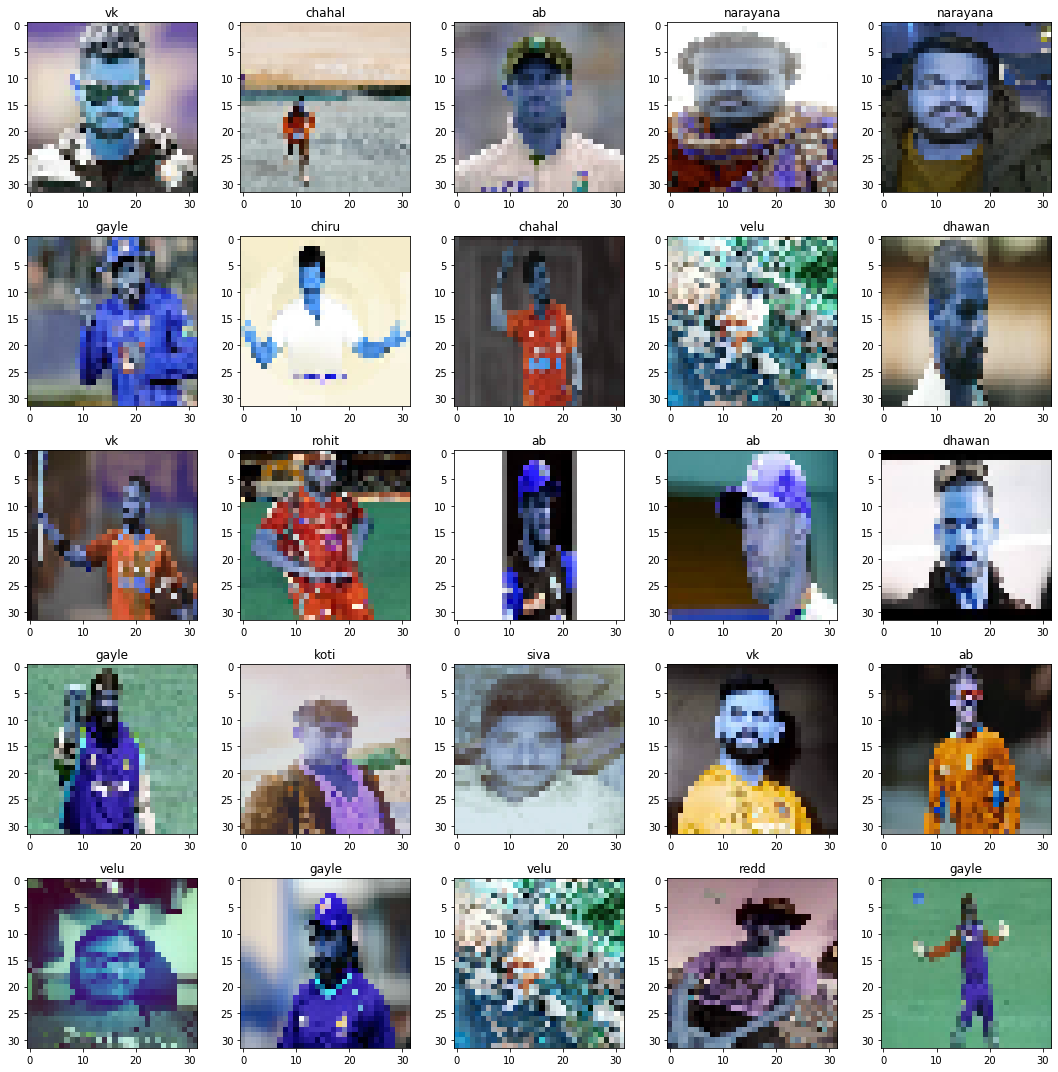

In [21]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(Z[l])
        
plt.tight_layout()

In [22]:
le=LabelEncoder()
Y=list(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=45)

In [24]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [27]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [29]:
model.compile(optimizer=Adam(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 500, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/500
7/7 [==============================] - ETA: 2s - loss: 3.0434 - accuracy: 0.05 - ETA: 1s - loss: 13.9032 - accuracy: 0.070 - ETA: 0s - loss: 10.2827 - accuracy: 0.054 - ETA: 0s - loss: 8.4719 - accuracy: 0.058 - ETA: 0s - loss: 7.3802 - accuracy: 0.05 - ETA: 0s - loss: 6.6737 - accuracy: 0.05 - 1s 191ms/step - loss: 6.1648 - accuracy: 0.0600 - val_loss: 3.0202 - val_accuracy: 0.0542
Epoch 2/500
7/7 [==============================] - ETA: 0s - loss: 3.0307 - accuracy: 0.02 - ETA: 0s - loss: 3.0216 - accuracy: 0.03 - ETA: 0s - loss: 3.0257 - accuracy: 0.03 - ETA: 0s - loss: 3.0221 - accuracy: 0.05 - ETA: 0s - loss: 3.0155 - accuracy: 0.06 - ETA: 0s - loss: 3.0152 - accuracy: 0.07 - 1s 157ms/step - loss: 3.0135 - accuracy: 0.0751 - val_loss: 3.0044 - val_accuracy: 0.0904
Epoch 3/500
7/7 [==============================] - ETA: 0s - loss: 3.0338 - accuracy: 0.08 - ETA: 0s - loss: 3.0078 - accuracy: 0.10 - ETA: 0s - loss: 2.9905 - accuracy: 0.11 - ETA: 0s - loss: 3.0058 - accurac

Epoch 22/500
7/7 [==============================] - ETA: 1s - loss: 2.9612 - accuracy: 0.10 - ETA: 1s - loss: 2.9621 - accuracy: 0.10 - ETA: 0s - loss: 2.9763 - accuracy: 0.08 - ETA: 0s - loss: 2.9893 - accuracy: 0.07 - ETA: 0s - loss: 2.9941 - accuracy: 0.07 - ETA: 0s - loss: 2.9865 - accuracy: 0.07 - 2s 220ms/step - loss: 2.9873 - accuracy: 0.0815 - val_loss: 2.9951 - val_accuracy: 0.0904
Epoch 23/500
7/7 [==============================] - ETA: 1s - loss: 2.9604 - accuracy: 0.10 - ETA: 1s - loss: 2.9751 - accuracy: 0.09 - ETA: 0s - loss: 2.9653 - accuracy: 0.10 - ETA: 0s - loss: 2.9831 - accuracy: 0.09 - ETA: 0s - loss: 2.9920 - accuracy: 0.09 - ETA: 0s - loss: 2.9900 - accuracy: 0.09 - 1s 194ms/step - loss: 2.9849 - accuracy: 0.0935 - val_loss: 2.9952 - val_accuracy: 0.0904
Epoch 24/500
7/7 [==============================] - ETA: 0s - loss: 2.9845 - accuracy: 0.09 - ETA: 0s - loss: 2.9911 - accuracy: 0.08 - ETA: 0s - loss: 2.9929 - accuracy: 0.07 - ETA: 0s - loss: 2.9924 - accuracy:

Epoch 43/500
7/7 [==============================] - ETA: 0s - loss: 2.9908 - accuracy: 0.08 - ETA: 0s - loss: 3.0059 - accuracy: 0.07 - ETA: 0s - loss: 3.0001 - accuracy: 0.09 - ETA: 0s - loss: 2.9976 - accuracy: 0.09 - ETA: 0s - loss: 2.9967 - accuracy: 0.09 - ETA: 0s - loss: 2.9928 - accuracy: 0.09 - 1s 180ms/step - loss: 2.9894 - accuracy: 0.1005 - val_loss: 2.9931 - val_accuracy: 0.0904
Epoch 44/500
7/7 [==============================] - ETA: 0s - loss: 3.0043 - accuracy: 0.05 - ETA: 0s - loss: 3.0081 - accuracy: 0.06 - ETA: 0s - loss: 2.9881 - accuracy: 0.07 - ETA: 0s - loss: 2.9913 - accuracy: 0.07 - ETA: 0s - loss: 2.9884 - accuracy: 0.08 - ETA: 0s - loss: 2.9910 - accuracy: 0.08 - 1s 173ms/step - loss: 2.9896 - accuracy: 0.0912 - val_loss: 2.9905 - val_accuracy: 0.0904
Epoch 45/500
7/7 [==============================] - ETA: 0s - loss: 2.9935 - accuracy: 0.10 - ETA: 0s - loss: 3.0008 - accuracy: 0.08 - ETA: 0s - loss: 2.9812 - accuracy: 0.10 - ETA: 0s - loss: 2.9788 - accuracy:

Epoch 64/500
7/7 [==============================] - ETA: 0s - loss: 3.0413 - accuracy: 0.11 - ETA: 0s - loss: 2.9924 - accuracy: 0.11 - ETA: 0s - loss: 2.9967 - accuracy: 0.09 - ETA: 0s - loss: 2.9837 - accuracy: 0.09 - ETA: 0s - loss: 2.9853 - accuracy: 0.09 - ETA: 0s - loss: 2.9825 - accuracy: 0.09 - 1s 180ms/step - loss: 2.9860 - accuracy: 0.0982 - val_loss: 2.9937 - val_accuracy: 0.0904
Epoch 65/500
7/7 [==============================] - ETA: 0s - loss: 3.0076 - accuracy: 0.09 - ETA: 0s - loss: 2.9932 - accuracy: 0.08 - ETA: 0s - loss: 2.9808 - accuracy: 0.09 - ETA: 0s - loss: 2.9825 - accuracy: 0.09 - ETA: 0s - loss: 2.9800 - accuracy: 0.09 - ETA: 0s - loss: 2.9838 - accuracy: 0.09 - 1s 192ms/step - loss: 2.9856 - accuracy: 0.0958 - val_loss: 2.9928 - val_accuracy: 0.0904
Epoch 66/500
7/7 [==============================] - ETA: 1s - loss: 2.9686 - accuracy: 0.10 - ETA: 1s - loss: 2.9848 - accuracy: 0.10 - ETA: 1s - loss: 2.9799 - accuracy: 0.10 - ETA: 0s - loss: 2.9731 - accuracy:

Epoch 85/500
7/7 [==============================] - ETA: 1s - loss: 2.9874 - accuracy: 0.09 - ETA: 1s - loss: 2.9768 - accuracy: 0.09 - ETA: 0s - loss: 2.9799 - accuracy: 0.09 - ETA: 0s - loss: 2.9872 - accuracy: 0.09 - ETA: 0s - loss: 2.9890 - accuracy: 0.09 - ETA: 0s - loss: 2.9912 - accuracy: 0.09 - 2s 224ms/step - loss: 2.9829 - accuracy: 0.1016 - val_loss: 2.9950 - val_accuracy: 0.0904
Epoch 86/500
7/7 [==============================] - ETA: 1s - loss: 2.9850 - accuracy: 0.07 - ETA: 0s - loss: 2.9789 - accuracy: 0.07 - ETA: 0s - loss: 2.9722 - accuracy: 0.08 - ETA: 0s - loss: 2.9827 - accuracy: 0.08 - ETA: 0s - loss: 2.9893 - accuracy: 0.08 - ETA: 0s - loss: 2.9938 - accuracy: 0.08 - 2s 297ms/step - loss: 2.9946 - accuracy: 0.0878 - val_loss: 2.9944 - val_accuracy: 0.0904
Epoch 87/500
7/7 [==============================] - ETA: 1s - loss: 2.9973 - accuracy: 0.08 - ETA: 1s - loss: 2.9766 - accuracy: 0.08 - ETA: 1s - loss: 2.9693 - accuracy: 0.10 - ETA: 0s - loss: 2.9642 - accuracy:

Epoch 106/500
7/7 [==============================] - ETA: 1s - loss: 2.9745 - accuracy: 0.06 - ETA: 1s - loss: 2.9770 - accuracy: 0.06 - ETA: 0s - loss: 2.9954 - accuracy: 0.06 - ETA: 0s - loss: 2.9850 - accuracy: 0.07 - ETA: 0s - loss: 2.9883 - accuracy: 0.07 - ETA: 0s - loss: 2.9848 - accuracy: 0.08 - 2s 219ms/step - loss: 2.9805 - accuracy: 0.0889 - val_loss: 2.9944 - val_accuracy: 0.0904
Epoch 107/500
7/7 [==============================] - ETA: 0s - loss: 2.9827 - accuracy: 0.10 - ETA: 0s - loss: 2.9917 - accuracy: 0.10 - ETA: 0s - loss: 2.9835 - accuracy: 0.09 - ETA: 0s - loss: 2.9816 - accuracy: 0.09 - ETA: 0s - loss: 2.9831 - accuracy: 0.10 - ETA: 0s - loss: 2.9822 - accuracy: 0.10 - 1s 189ms/step - loss: 2.9740 - accuracy: 0.1060 - val_loss: 2.9962 - val_accuracy: 0.0904
Epoch 108/500
7/7 [==============================] - ETA: 0s - loss: 3.0093 - accuracy: 0.07 - ETA: 0s - loss: 3.0161 - accuracy: 0.08 - ETA: 0s - loss: 3.0137 - accuracy: 0.07 - ETA: 0s - loss: 3.0004 - accura

7/7 [==============================] - ETA: 0s - loss: 2.9881 - accuracy: 0.07 - ETA: 0s - loss: 2.9947 - accuracy: 0.08 - ETA: 0s - loss: 2.9982 - accuracy: 0.08 - ETA: 0s - loss: 3.0013 - accuracy: 0.08 - ETA: 0s - loss: 3.0012 - accuracy: 0.08 - ETA: 0s - loss: 2.9974 - accuracy: 0.08 - 1s 176ms/step - loss: 2.9929 - accuracy: 0.0889 - val_loss: 2.9945 - val_accuracy: 0.0904
Epoch 127/500
7/7 [==============================] - ETA: 0s - loss: 2.9749 - accuracy: 0.10 - ETA: 0s - loss: 3.0061 - accuracy: 0.10 - ETA: 0s - loss: 3.0132 - accuracy: 0.09 - ETA: 0s - loss: 3.0034 - accuracy: 0.09 - ETA: 0s - loss: 2.9920 - accuracy: 0.10 - ETA: 0s - loss: 2.9882 - accuracy: 0.09 - 1s 179ms/step - loss: 2.9953 - accuracy: 0.0901 - val_loss: 2.9930 - val_accuracy: 0.0904
Epoch 128/500
7/7 [==============================] - ETA: 0s - loss: 3.0309 - accuracy: 0.07 - ETA: 0s - loss: 3.0051 - accuracy: 0.07 - ETA: 0s - loss: 3.0033 - accuracy: 0.08 - ETA: 0s - loss: 2.9982 - accuracy: 0.07 - ETA

Epoch 147/500
7/7 [==============================] - ETA: 0s - loss: 3.0132 - accuracy: 0.07 - ETA: 0s - loss: 2.9946 - accuracy: 0.07 - ETA: 0s - loss: 2.9807 - accuracy: 0.09 - ETA: 0s - loss: 2.9739 - accuracy: 0.09 - ETA: 0s - loss: 2.9753 - accuracy: 0.09 - ETA: 0s - loss: 2.9830 - accuracy: 0.09 - 1s 214ms/step - loss: 2.9832 - accuracy: 0.0912 - val_loss: 2.9942 - val_accuracy: 0.0904
Epoch 148/500
7/7 [==============================] - ETA: 0s - loss: 2.9834 - accuracy: 0.11 - ETA: 0s - loss: 2.9866 - accuracy: 0.11 - ETA: 0s - loss: 2.9937 - accuracy: 0.09 - ETA: 0s - loss: 2.9908 - accuracy: 0.09 - ETA: 0s - loss: 2.9928 - accuracy: 0.09 - ETA: 0s - loss: 2.9937 - accuracy: 0.08 - 2s 252ms/step - loss: 2.9988 - accuracy: 0.0849 - val_loss: 2.9942 - val_accuracy: 0.0904
Epoch 149/500
7/7 [==============================] - ETA: 1s - loss: 3.0025 - accuracy: 0.08 - ETA: 1s - loss: 2.9681 - accuracy: 0.12 - ETA: 0s - loss: 2.9574 - accuracy: 0.13 - ETA: 0s - loss: 2.9695 - accura

7/7 [==============================] - ETA: 1s - loss: 3.0168 - accuracy: 0.10 - ETA: 1s - loss: 2.9930 - accuracy: 0.08 - ETA: 1s - loss: 2.9901 - accuracy: 0.10 - ETA: 0s - loss: 2.9990 - accuracy: 0.09 - ETA: 0s - loss: 2.9944 - accuracy: 0.08 - ETA: 0s - loss: 2.9899 - accuracy: 0.09 - 2s 273ms/step - loss: 2.9857 - accuracy: 0.0970 - val_loss: 2.9934 - val_accuracy: 0.0904
Epoch 168/500
7/7 [==============================] - ETA: 1s - loss: 2.9517 - accuracy: 0.13 - ETA: 1s - loss: 2.9871 - accuracy: 0.09 - ETA: 0s - loss: 2.9802 - accuracy: 0.09 - ETA: 0s - loss: 2.9866 - accuracy: 0.10 - ETA: 0s - loss: 2.9781 - accuracy: 0.10 - ETA: 0s - loss: 2.9886 - accuracy: 0.09 - 2s 289ms/step - loss: 2.9863 - accuracy: 0.0958 - val_loss: 2.9938 - val_accuracy: 0.0904
Epoch 169/500
7/7 [==============================] - ETA: 1s - loss: 2.9361 - accuracy: 0.12 - ETA: 1s - loss: 2.9542 - accuracy: 0.11 - ETA: 1s - loss: 2.9553 - accuracy: 0.11 - ETA: 0s - loss: 2.9565 - accuracy: 0.11 - ETA

Epoch 188/500
7/7 [==============================] - ETA: 1s - loss: 2.9950 - accuracy: 0.10 - ETA: 1s - loss: 2.9875 - accuracy: 0.09 - ETA: 0s - loss: 2.9874 - accuracy: 0.09 - ETA: 0s - loss: 2.9801 - accuracy: 0.09 - ETA: 0s - loss: 2.9821 - accuracy: 0.09 - ETA: 0s - loss: 2.9804 - accuracy: 0.10 - 2s 244ms/step - loss: 2.9856 - accuracy: 0.0924 - val_loss: 2.9933 - val_accuracy: 0.0904
Epoch 189/500
7/7 [==============================] - ETA: 1s - loss: 3.0068 - accuracy: 0.10 - ETA: 1s - loss: 2.9832 - accuracy: 0.10 - ETA: 0s - loss: 2.9853 - accuracy: 0.09 - ETA: 0s - loss: 2.9830 - accuracy: 0.10 - ETA: 0s - loss: 2.9900 - accuracy: 0.09 - ETA: 0s - loss: 2.9844 - accuracy: 0.10 - 2s 258ms/step - loss: 2.9861 - accuracy: 0.1016 - val_loss: 2.9939 - val_accuracy: 0.0904
Epoch 190/500
7/7 [==============================] - ETA: 0s - loss: 3.0173 - accuracy: 0.06 - ETA: 0s - loss: 2.9867 - accuracy: 0.08 - ETA: 0s - loss: 2.9891 - accuracy: 0.07 - ETA: 0s - loss: 2.9961 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9657 - accuracy: 0.11 - ETA: 0s - loss: 2.9770 - accuracy: 0.10 - ETA: 0s - loss: 2.9729 - accuracy: 0.09 - ETA: 0s - loss: 2.9699 - accuracy: 0.09 - ETA: 0s - loss: 2.9705 - accuracy: 0.10 - ETA: 0s - loss: 2.9783 - accuracy: 0.09 - 1s 213ms/step - loss: 2.9789 - accuracy: 0.0982 - val_loss: 2.9945 - val_accuracy: 0.0904
Epoch 209/500
7/7 [==============================] - ETA: 1s - loss: 2.9866 - accuracy: 0.09 - ETA: 0s - loss: 2.9892 - accuracy: 0.09 - ETA: 0s - loss: 2.9944 - accuracy: 0.09 - ETA: 0s - loss: 2.9839 - accuracy: 0.09 - ETA: 0s - loss: 2.9745 - accuracy: 0.10 - ETA: 0s - loss: 2.9788 - accuracy: 0.10 - 1s 204ms/step - loss: 2.9806 - accuracy: 0.0970 - val_loss: 2.9947 - val_accuracy: 0.0904
Epoch 210/500
7/7 [==============================] - ETA: 1s - loss: 2.9950 - accuracy: 0.09 - ETA: 0s - loss: 2.9691 - accuracy: 0.09 - ETA: 0s - loss: 2.9778 - accuracy: 0.09 - ETA: 0s - loss: 2.9749 - accuracy: 0.10 - ETA

Epoch 229/500
7/7 [==============================] - ETA: 1s - loss: 3.0337 - accuracy: 0.07 - ETA: 1s - loss: 2.9864 - accuracy: 0.11 - ETA: 0s - loss: 2.9830 - accuracy: 0.11 - ETA: 0s - loss: 2.9839 - accuracy: 0.10 - ETA: 0s - loss: 2.9947 - accuracy: 0.09 - ETA: 0s - loss: 2.9916 - accuracy: 0.10 - 2s 235ms/step - loss: 2.9953 - accuracy: 0.0982 - val_loss: 2.9942 - val_accuracy: 0.0904
Epoch 230/500
7/7 [==============================] - ETA: 1s - loss: 2.9456 - accuracy: 0.14 - ETA: 0s - loss: 2.9713 - accuracy: 0.10 - ETA: 0s - loss: 2.9768 - accuracy: 0.09 - ETA: 0s - loss: 2.9762 - accuracy: 0.09 - ETA: 0s - loss: 2.9684 - accuracy: 0.10 - ETA: 0s - loss: 2.9715 - accuracy: 0.09 - 2s 265ms/step - loss: 2.9777 - accuracy: 0.0982 - val_loss: 2.9938 - val_accuracy: 0.0904
Epoch 231/500
7/7 [==============================] - ETA: 1s - loss: 2.9502 - accuracy: 0.13 - ETA: 1s - loss: 2.9670 - accuracy: 0.09 - ETA: 1s - loss: 2.9798 - accuracy: 0.09 - ETA: 0s - loss: 2.9756 - accura

7/7 [==============================] - ETA: 1s - loss: 3.0027 - accuracy: 0.14 - ETA: 0s - loss: 2.9809 - accuracy: 0.11 - ETA: 0s - loss: 2.9749 - accuracy: 0.10 - ETA: 0s - loss: 2.9645 - accuracy: 0.11 - ETA: 0s - loss: 2.9686 - accuracy: 0.10 - ETA: 0s - loss: 2.9711 - accuracy: 0.10 - 2s 221ms/step - loss: 2.9749 - accuracy: 0.1028 - val_loss: 2.9937 - val_accuracy: 0.0904
Epoch 250/500
7/7 [==============================] - ETA: 1s - loss: 3.0338 - accuracy: 0.05 - ETA: 1s - loss: 3.0195 - accuracy: 0.07 - ETA: 0s - loss: 3.0013 - accuracy: 0.09 - ETA: 0s - loss: 3.0001 - accuracy: 0.08 - ETA: 0s - loss: 2.9935 - accuracy: 0.09 - ETA: 0s - loss: 2.9892 - accuracy: 0.09 - 2s 224ms/step - loss: 2.9892 - accuracy: 0.0935 - val_loss: 2.9939 - val_accuracy: 0.0904
Epoch 251/500
7/7 [==============================] - ETA: 1s - loss: 2.9710 - accuracy: 0.07 - ETA: 0s - loss: 2.9897 - accuracy: 0.08 - ETA: 0s - loss: 2.9814 - accuracy: 0.09 - ETA: 0s - loss: 2.9728 - accuracy: 0.09 - ETA

Epoch 270/500
7/7 [==============================] - ETA: 1s - loss: 2.9690 - accuracy: 0.08 - ETA: 0s - loss: 2.9818 - accuracy: 0.09 - ETA: 0s - loss: 2.9796 - accuracy: 0.09 - ETA: 0s - loss: 2.9785 - accuracy: 0.08 - ETA: 0s - loss: 2.9791 - accuracy: 0.09 - ETA: 0s - loss: 2.9727 - accuracy: 0.10 - 2s 228ms/step - loss: 2.9787 - accuracy: 0.0982 - val_loss: 2.9945 - val_accuracy: 0.0904
Epoch 271/500
7/7 [==============================] - ETA: 1s - loss: 3.0187 - accuracy: 0.07 - ETA: 0s - loss: 2.9974 - accuracy: 0.08 - ETA: 0s - loss: 2.9764 - accuracy: 0.09 - ETA: 0s - loss: 2.9798 - accuracy: 0.09 - ETA: 0s - loss: 2.9771 - accuracy: 0.09 - ETA: 0s - loss: 2.9868 - accuracy: 0.09 - 1s 198ms/step - loss: 2.9856 - accuracy: 0.0935 - val_loss: 2.9941 - val_accuracy: 0.0904
Epoch 272/500
7/7 [==============================] - ETA: 1s - loss: 3.0037 - accuracy: 0.08 - ETA: 0s - loss: 3.0289 - accuracy: 0.08 - ETA: 0s - loss: 3.0073 - accuracy: 0.10 - ETA: 0s - loss: 3.0057 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9824 - accuracy: 0.13 - ETA: 1s - loss: 2.9996 - accuracy: 0.11 - ETA: 0s - loss: 2.9839 - accuracy: 0.11 - ETA: 0s - loss: 2.9848 - accuracy: 0.10 - ETA: 0s - loss: 2.9851 - accuracy: 0.10 - ETA: 0s - loss: 2.9832 - accuracy: 0.10 - 2s 234ms/step - loss: 2.9840 - accuracy: 0.0982 - val_loss: 2.9944 - val_accuracy: 0.0904
Epoch 291/500
7/7 [==============================] - ETA: 1s - loss: 2.9697 - accuracy: 0.11 - ETA: 0s - loss: 2.9794 - accuracy: 0.10 - ETA: 0s - loss: 2.9935 - accuracy: 0.09 - ETA: 0s - loss: 3.0017 - accuracy: 0.08 - ETA: 0s - loss: 2.9968 - accuracy: 0.08 - ETA: 0s - loss: 2.9923 - accuracy: 0.08 - 1s 213ms/step - loss: 2.9876 - accuracy: 0.0970 - val_loss: 2.9944 - val_accuracy: 0.0904
Epoch 292/500
7/7 [==============================] - ETA: 1s - loss: 2.9687 - accuracy: 0.12 - ETA: 0s - loss: 2.9643 - accuracy: 0.11 - ETA: 0s - loss: 2.9744 - accuracy: 0.10 - ETA: 0s - loss: 2.9783 - accuracy: 0.09 - ETA

Epoch 311/500
7/7 [==============================] - ETA: 1s - loss: 2.9879 - accuracy: 0.09 - ETA: 0s - loss: 2.9980 - accuracy: 0.08 - ETA: 0s - loss: 2.9912 - accuracy: 0.09 - ETA: 0s - loss: 2.9871 - accuracy: 0.10 - ETA: 0s - loss: 2.9823 - accuracy: 0.10 - ETA: 0s - loss: 2.9758 - accuracy: 0.10 - 2s 218ms/step - loss: 2.9753 - accuracy: 0.1109 - val_loss: 2.9942 - val_accuracy: 0.0904
Epoch 312/500
7/7 [==============================] - ETA: 1s - loss: 3.0065 - accuracy: 0.09 - ETA: 0s - loss: 2.9738 - accuracy: 0.10 - ETA: 0s - loss: 2.9698 - accuracy: 0.10 - ETA: 0s - loss: 2.9715 - accuracy: 0.10 - ETA: 0s - loss: 2.9794 - accuracy: 0.09 - ETA: 0s - loss: 2.9791 - accuracy: 0.09 - 1s 208ms/step - loss: 2.9874 - accuracy: 0.0901 - val_loss: 2.9956 - val_accuracy: 0.0904
Epoch 313/500
7/7 [==============================] - ETA: 0s - loss: 2.9838 - accuracy: 0.11 - ETA: 0s - loss: 2.9945 - accuracy: 0.09 - ETA: 0s - loss: 2.9936 - accuracy: 0.09 - ETA: 0s - loss: 2.9833 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9831 - accuracy: 0.07 - ETA: 1s - loss: 2.9856 - accuracy: 0.08 - ETA: 0s - loss: 2.9751 - accuracy: 0.09 - ETA: 0s - loss: 2.9720 - accuracy: 0.09 - ETA: 0s - loss: 2.9757 - accuracy: 0.09 - ETA: 0s - loss: 2.9752 - accuracy: 0.10 - 2s 287ms/step - loss: 2.9856 - accuracy: 0.0949 - val_loss: 2.9943 - val_accuracy: 0.0904
Epoch 332/500
7/7 [==============================] - ETA: 1s - loss: 2.9596 - accuracy: 0.11 - ETA: 1s - loss: 2.9899 - accuracy: 0.08 - ETA: 1s - loss: 2.9758 - accuracy: 0.09 - ETA: 0s - loss: 2.9861 - accuracy: 0.08 - ETA: 0s - loss: 2.9955 - accuracy: 0.08 - ETA: 0s - loss: 2.9889 - accuracy: 0.09 - 2s 276ms/step - loss: 2.9877 - accuracy: 0.0933 - val_loss: 2.9936 - val_accuracy: 0.0904
Epoch 333/500
7/7 [==============================] - ETA: 1s - loss: 2.9967 - accuracy: 0.06 - ETA: 1s - loss: 2.9552 - accuracy: 0.10 - ETA: 1s - loss: 2.9628 - accuracy: 0.10 - ETA: 0s - loss: 2.9688 - accuracy: 0.09 - ETA

Epoch 352/500
7/7 [==============================] - ETA: 1s - loss: 3.0006 - accuracy: 0.11 - ETA: 1s - loss: 2.9839 - accuracy: 0.10 - ETA: 0s - loss: 2.9794 - accuracy: 0.09 - ETA: 0s - loss: 2.9752 - accuracy: 0.10 - ETA: 0s - loss: 2.9775 - accuracy: 0.10 - ETA: 0s - loss: 2.9858 - accuracy: 0.10 - 2s 236ms/step - loss: 2.9835 - accuracy: 0.1005 - val_loss: 2.9934 - val_accuracy: 0.0904
Epoch 353/500
7/7 [==============================] - ETA: 1s - loss: 3.0232 - accuracy: 0.09 - ETA: 1s - loss: 2.9988 - accuracy: 0.11 - ETA: 0s - loss: 2.9911 - accuracy: 0.11 - ETA: 0s - loss: 2.9917 - accuracy: 0.10 - ETA: 0s - loss: 2.9987 - accuracy: 0.10 - ETA: 0s - loss: 2.9918 - accuracy: 0.09 - 2s 247ms/step - loss: 2.9869 - accuracy: 0.0947 - val_loss: 2.9931 - val_accuracy: 0.0904
Epoch 354/500
7/7 [==============================] - ETA: 1s - loss: 2.9649 - accuracy: 0.10 - ETA: 1s - loss: 2.9533 - accuracy: 0.11 - ETA: 1s - loss: 2.9831 - accuracy: 0.10 - ETA: 0s - loss: 2.9700 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9628 - accuracy: 0.10 - ETA: 1s - loss: 2.9586 - accuracy: 0.10 - ETA: 0s - loss: 2.9600 - accuracy: 0.10 - ETA: 0s - loss: 2.9605 - accuracy: 0.10 - ETA: 0s - loss: 2.9604 - accuracy: 0.10 - ETA: 0s - loss: 2.9613 - accuracy: 0.10 - 2s 237ms/step - loss: 2.9662 - accuracy: 0.1005 - val_loss: 2.9941 - val_accuracy: 0.0904
Epoch 373/500
7/7 [==============================] - ETA: 1s - loss: 3.0489 - accuracy: 0.06 - ETA: 1s - loss: 3.0197 - accuracy: 0.08 - ETA: 0s - loss: 3.0066 - accuracy: 0.08 - ETA: 0s - loss: 2.9945 - accuracy: 0.09 - ETA: 0s - loss: 2.9885 - accuracy: 0.09 - ETA: 0s - loss: 2.9846 - accuracy: 0.09 - 2s 228ms/step - loss: 2.9878 - accuracy: 0.0949 - val_loss: 2.9944 - val_accuracy: 0.0904
Epoch 374/500
7/7 [==============================] - ETA: 0s - loss: 2.9850 - accuracy: 0.14 - ETA: 0s - loss: 2.9941 - accuracy: 0.10 - ETA: 0s - loss: 2.9775 - accuracy: 0.11 - ETA: 0s - loss: 2.9833 - accuracy: 0.10 - ETA

Epoch 393/500
7/7 [==============================] - ETA: 1s - loss: 2.9813 - accuracy: 0.07 - ETA: 0s - loss: 2.9782 - accuracy: 0.07 - ETA: 0s - loss: 2.9818 - accuracy: 0.07 - ETA: 0s - loss: 2.9776 - accuracy: 0.08 - ETA: 0s - loss: 2.9789 - accuracy: 0.08 - ETA: 0s - loss: 2.9774 - accuracy: 0.09 - 2s 225ms/step - loss: 2.9778 - accuracy: 0.0982 - val_loss: 2.9932 - val_accuracy: 0.0904
Epoch 394/500
7/7 [==============================] - ETA: 1s - loss: 3.0162 - accuracy: 0.08 - ETA: 1s - loss: 3.0097 - accuracy: 0.08 - ETA: 0s - loss: 2.9946 - accuracy: 0.09 - ETA: 0s - loss: 2.9820 - accuracy: 0.10 - ETA: 0s - loss: 2.9829 - accuracy: 0.09 - ETA: 0s - loss: 2.9788 - accuracy: 0.10 - 2s 241ms/step - loss: 2.9822 - accuracy: 0.1027 - val_loss: 2.9935 - val_accuracy: 0.0904
Epoch 395/500
7/7 [==============================] - ETA: 0s - loss: 3.0213 - accuracy: 0.05 - ETA: 0s - loss: 3.0073 - accuracy: 0.06 - ETA: 0s - loss: 3.0083 - accuracy: 0.07 - ETA: 0s - loss: 3.0085 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9394 - accuracy: 0.12 - ETA: 0s - loss: 2.9557 - accuracy: 0.10 - ETA: 0s - loss: 2.9553 - accuracy: 0.10 - ETA: 0s - loss: 2.9792 - accuracy: 0.09 - ETA: 0s - loss: 2.9751 - accuracy: 0.09 - ETA: 0s - loss: 2.9783 - accuracy: 0.09 - 2s 231ms/step - loss: 2.9772 - accuracy: 0.0949 - val_loss: 2.9943 - val_accuracy: 0.0904
Epoch 414/500
7/7 [==============================] - ETA: 1s - loss: 2.9535 - accuracy: 0.11 - ETA: 0s - loss: 2.9722 - accuracy: 0.10 - ETA: 0s - loss: 2.9693 - accuracy: 0.09 - ETA: 0s - loss: 2.9724 - accuracy: 0.09 - ETA: 0s - loss: 2.9882 - accuracy: 0.09 - ETA: 0s - loss: 2.9847 - accuracy: 0.10 - 2s 221ms/step - loss: 2.9808 - accuracy: 0.1028 - val_loss: 2.9942 - val_accuracy: 0.0904
Epoch 415/500
7/7 [==============================] - ETA: 1s - loss: 2.9845 - accuracy: 0.04 - ETA: 0s - loss: 2.9972 - accuracy: 0.05 - ETA: 0s - loss: 2.9893 - accuracy: 0.07 - ETA: 0s - loss: 2.9816 - accuracy: 0.08 - ETA

Epoch 434/500
7/7 [==============================] - ETA: 1s - loss: 2.9876 - accuracy: 0.10 - ETA: 1s - loss: 2.9838 - accuracy: 0.09 - ETA: 0s - loss: 2.9834 - accuracy: 0.10 - ETA: 0s - loss: 2.9820 - accuracy: 0.09 - ETA: 0s - loss: 2.9821 - accuracy: 0.10 - ETA: 0s - loss: 2.9836 - accuracy: 0.09 - 2s 270ms/step - loss: 2.9846 - accuracy: 0.0935 - val_loss: 2.9938 - val_accuracy: 0.0904
Epoch 435/500
7/7 [==============================] - ETA: 1s - loss: 2.9551 - accuracy: 0.10 - ETA: 1s - loss: 2.9786 - accuracy: 0.10 - ETA: 0s - loss: 3.0090 - accuracy: 0.09 - ETA: 0s - loss: 2.9961 - accuracy: 0.09 - ETA: 0s - loss: 2.9821 - accuracy: 0.10 - ETA: 0s - loss: 2.9905 - accuracy: 0.09 - 2s 263ms/step - loss: 2.9892 - accuracy: 0.0935 - val_loss: 2.9936 - val_accuracy: 0.0904
Epoch 436/500
7/7 [==============================] - ETA: 1s - loss: 2.9595 - accuracy: 0.13 - ETA: 1s - loss: 2.9611 - accuracy: 0.11 - ETA: 0s - loss: 2.9623 - accuracy: 0.11 - ETA: 0s - loss: 2.9714 - accura

7/7 [==============================] - ETA: 1s - loss: 2.9991 - accuracy: 0.07 - ETA: 1s - loss: 2.9881 - accuracy: 0.07 - ETA: 0s - loss: 2.9815 - accuracy: 0.08 - ETA: 0s - loss: 2.9695 - accuracy: 0.10 - ETA: 0s - loss: 2.9662 - accuracy: 0.10 - ETA: 0s - loss: 2.9677 - accuracy: 0.10 - 2s 241ms/step - loss: 2.9724 - accuracy: 0.1004 - val_loss: 2.9934 - val_accuracy: 0.0904
Epoch 455/500
7/7 [==============================] - ETA: 1s - loss: 3.0277 - accuracy: 0.07 - ETA: 1s - loss: 3.0059 - accuracy: 0.07 - ETA: 0s - loss: 2.9947 - accuracy: 0.08 - ETA: 0s - loss: 2.9735 - accuracy: 0.10 - ETA: 0s - loss: 2.9691 - accuracy: 0.10 - ETA: 0s - loss: 2.9804 - accuracy: 0.09 - 2s 216ms/step - loss: 2.9803 - accuracy: 0.0993 - val_loss: 2.9940 - val_accuracy: 0.0904
Epoch 456/500
7/7 [==============================] - ETA: 1s - loss: 2.9680 - accuracy: 0.10 - ETA: 0s - loss: 2.9644 - accuracy: 0.10 - ETA: 0s - loss: 2.9658 - accuracy: 0.10 - ETA: 0s - loss: 2.9765 - accuracy: 0.09 - ETA

In [15]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

NameError: name 'History' is not defined

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==300):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==300):
        break

In [ ]:
count=0
fig,ax=plt.subplots(10,4)
fig.set_size_inches(15,15)
for i in range (10):
    for j in range (4):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

In [ ]:
count=0
fig,ax=plt.subplots(6,5)
fig.set_size_inches(15,15)
for i in range (6):
    for j in range (5):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [ ]:
def prepare (filepath):
    IMG_SIZE=256;
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-3,IMG_SIZE,IMG_SIZE,3)


In [ ]:
prediction=model.predict([prepare('venkey.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))

In [ ]:
prediction=model.predict([prepare('narayana.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))

In [ ]:

prediction=model.predict([prepare('samar.jpeg')])
pred_digits=np.argmax(prediction,axis=1)
str(le.inverse_transform([pred_digits]))